In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pickle

In [2]:
# load the true value dictionary from file
gb_dict = pickle.load( open( "/home/riag/data/store_class_dictionary_updated.pickle", "rb" ) )

In [3]:
list_del = []
list_k = []
list_r = []
count = 0
for key,val in gb_dict.items():
        sales_df = val.values
        index_df = val.index
        df = pd.DataFrame(data = sales_df, index= index_df, columns = ['y'])
        #year_
        #count_year = df[df['y']==0].count()
        year_df = val.loc[val.index<'2017'] 
        count_in_group = year_df[year_df['totalSales'] == 0]['totalSales'].count()
        
#         if count_in_group < 52*5*.3:
#             list_del.append(key)
        # thresholding on 50%: 1052
        # thresholding on 30%: 969
        
        if count_in_group >= 250:
            list_del.append(key)
        
#         df.drop(indexNames , inplace=True)
#         tmp2 = df.groupby(df.index.year).agg(['count'])
#         if 2015 in tmp2.index:
#             k = tmp2.loc[2015].values
#             list_k.append(k)
#         if 2016 in tmp2.index:
#             r = tmp2.loc[2016].values
#             list_r.append(r)
#         if (k+r) < 30:
#             list_del.append(key)  
#         Removed 889
        

In [4]:
print(len(list_del))
# for k, v in gb_dict.items():
    

667


In [5]:
for key in list_del:
    gb_dict[key] = None

In [6]:
# Impute leaves, remove leaves if they have too few datapoints
zero=1.5
for key,val in gb_dict.items():
    if val is None :
        continue
    sales_df = val.values
    index_df = val.index
    df = pd.DataFrame(data = sales_df, index= index_df, columns = ['y'])
    #indexNames = df[ df['y'] == 0 ].index
    df = df.replace(to_replace = 0, value = zero) 
    neg_df = df.loc[df['y'] < 0] 
    index_drop = neg_df.index
    final_df = df.drop(index_drop)
    final_df['y'] = np.log(final_df['y'])
    gb_dict[key] = final_df['y']

In [7]:
# Save imputed leaves
with open('../data/store_class_log_neg_remove.pickle', 'wb') as f:
    pickle.dump(gb_dict, f)

In [8]:
val = list(gb_dict.items())[0][1]
val_range = val.loc[val.index.year >= 2017]
val_range.name='ds'


In [9]:
import time

t0 = time.time()
#Impute missing values further
#creating dictionaries to store them as pickle files after training the model

predict_sales = {}
valid_sales= {}
fcst_model = {}
model_all2 = {}
count, total = 0, len(gb_dict)

#training the Prophet model over each store-class combination
for key,val in gb_dict.items():
    if val is None:
        predict_sales[key] = pd.Series(data=np.zeros(val_range.shape, dtype=bool), 
                                       index=val_range.index, name='yhat')
        valid_sales[key] = pd.Series(data=np.zeros(val_range.shape, dtype=bool),
                                     index=val_range.index, name=str(key) )
        fcst_model[key] = None
        model_all2[key] = None
        continue
        
    sales_df = val.values
    index_df = val.index
    df = pd.DataFrame(data = sales_df, index= index_df, columns = ['y'])
    # splitting data into training and validation in 75:25 ratio
    train = df.loc[df.index.year<2017]
    test = df.loc[df.index.year>=2017]
    model = Prophet(daily_seasonality=False)
    model.fit(train.reset_index().rename(columns={'index':'ds'}))
    fcst = model.predict(df = test.reset_index().rename(columns={'index':'ds'}))
    fcst_model[key] = fcst
    y_pred = fcst.set_index('ds')['yhat']
    y_test = test['y']
    y_test.name=str(key)
    predict_sales[key] = y_pred
    valid_sales[key] = y_test
    model_all2[key] = model
    count += 1
    if count % 100 == 0: 
        print('Completed with: %d of %d. Elapsed time: %d'%(count, total, (time.time()-t0)/60))
        
print('Completed with: %d of %d. Elapsed time: %d'%(count, total, (time.time()-t0)/60))
print('...done')


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 100 of 2217. Elapsed time: 1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 200 of 2217. Elapsed time: 3


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 300 of 2217. Elapsed time: 5


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 400 of 2217. Elapsed time: 7


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 500 of 2217. Elapsed time: 10


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 600 of 2217. Elapsed time: 12


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 700 of 2217. Elapsed time: 14


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 800 of 2217. Elapsed time: 16


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 900 of 2217. Elapsed time: 18


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1000 of 2217. Elapsed time: 20


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1100 of 2217. Elapsed time: 22


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1200 of 2217. Elapsed time: 24


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1300 of 2217. Elapsed time: 26


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1400 of 2217. Elapsed time: 28


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1500 of 2217. Elapsed time: 30


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with we

Completed with: 1550 of 2217. Elapsed time: 31
...done


In [15]:
#saving the model
with open("store_class_imputed_all_eda_model.pickle", "wb") as f:
    pickle.dump(model_all2, f)

In [16]:
#saving the true values of validation set
with open("store_class_imputed_all_eda_true.pickle", "wb") as f:
    pickle.dump(valid_sales, f)

In [17]:
#saving the predicted values of validation set
with open("store_class_dictionary_imputed_all_eda_fcst_model.pickle", "wb") as f:
    pickle.dump(fcst_model, f)

In [23]:
#saving the predicted values of validation set
with open("store_class_dictionary_imputed_all_eda_sales.pickle", "wb") as f:
    pickle.dump(predict_sales, f)

In [19]:
# load the model dictionary from file
md_pred2 = pickle.load( open( "store_class_imputed_all_eda_model.pickle", "rb" ) )

In [20]:
# load the true value dictionary from file
true_pred = pickle.load( open( "store_class_imputed_all_eda_true.pickle", "rb" ) )

In [21]:
# load the predicted value dictionary from file
fcst_pred = pickle.load( open( "store_class_dictionary_imputed_all_eda_fcst_model.pickle", "rb" ) )

In [24]:
# load the predicted value dictionary from file
pred_sal = pickle.load( open( "store_class_dictionary_imputed_all_eda_sales.pickle", "rb" ) )

In [26]:
true_sales.head()

,"('store1', 'class1')","('store1', 'class10')","('store1', 'class11')","('store1', 'class12')","('store1', 'class13')","('store1', 'class14')","('store1', 'class15')","('store1', 'class16')","('store1', 'class17')","('store1', 'class18')",...,"('store9', 'class38')","('store9', 'class39')","('store9', 'class4')","('store9', 'class40')","('store9', 'class41')","('store9', 'class5')","('store9', 'class6')","('store9', 'class7')","('store9', 'class8')","('store9', 'class9')"
2017-01-01 00:00:00,8.413699,8.757468,7.575150,7.170820,6.348071,4.758436,8.016061,7.817385,NaN,5.027565,...,6.234343,6.132710,8.969928,6.544871,0.405465,5.079560,6.221658,9.188830,0.405465,5.507004
2017-01-08 00:00:00,8.165783,8.708064,7.086013,7.155774,6.851872,6.690774,7.607029,7.388392,0.405465,0.405465,...,NaN,5.814062,8.981578,5.807645,0.405465,0.405465,5.907627,8.626108,0.405465,0.405465
2017-01-15 00:00:00,7.560422,8.964518,7.971856,6.792437,7.256280,6.120229,7.422562,8.131126,0.405465,5.538390,...,6.551012,4.961777,8.674275,4.856417,0.405465,5.837246,7.171150,8.972233,0.405465,0.405465
2017-01-22 00:00:00,8.895346,9.199471,8.548555,6.312444,5.897870,7.192866,8.594139,8.786694,7.372364,5.027565,...,NaN,5.367242,9.008261,4.920955,0.405465,5.144099,7.968449,8.775636,5.982428,6.405160
2017-01-29 00:00:00,7.444556,8.750049,7.797898,7.415666,7.279251,6.207372,7.293435,8.875389,0.405465,6.610436,...,4.856417,4.268630,8.748214,0.405465,0.405465,6.719635,7.687667,8.902990,0.405465,0.405465


In [32]:
# add key as column name of series, return all series as dataframe

true_sales = pd.DataFrame()
for key, val in true_pred.items():
    val.name = str(key)
    true_sales = pd.concat([true_sales,val], axis=1)

true_sales = true_sales.apply(np.nan_to_num).apply(np.exp)
true_sales.head(5)

'1.18.1'

In [36]:
# add key as column name of series, return all series as dataframe

pred_sales = pd.DataFrame()
for key, val in predict_sales.items():
    val.name = str(key)
    pred_sales = pd.concat([pred_sales,val], axis=1)
pred_sales = pred_sales.apply(np.nan_to_num).apply(np.exp)
pred_sales.head(5)

,"('store1', 'class1')","('store1', 'class10')","('store1', 'class11')","('store1', 'class12')","('store1', 'class13')","('store1', 'class14')","('store1', 'class15')","('store1', 'class16')","('store1', 'class17')","('store1', 'class18')",...,"('store9', 'class38')","('store9', 'class39')","('store9', 'class4')","('store9', 'class40')","('store9', 'class41')","('store9', 'class5')","('store9', 'class6')","('store9', 'class7')","('store9', 'class8')","('store9', 'class9')"
2017-01-01 00:00:00,1458.513171,3126.689875,720.659221,199.628852,47.794971,270.489780,367.169819,793.343283,1.000000,0.724222,...,328.227460,308.987868,6756.994354,178.954794,11.027054,14.552263,69.636697,4036.612760,50.534813,17.952716
2017-01-08 00:00:00,1269.272199,2502.687081,918.264486,197.431851,140.351959,213.438724,723.422362,833.072547,1.236427,0.421561,...,1.000000,156.035225,4979.796658,149.015935,13.998896,17.780635,65.201413,3307.327644,65.782877,11.004710
2017-01-15 00:00:00,1721.669127,3371.772291,1603.175469,371.187441,368.585178,241.075483,1472.979852,1188.087898,0.443172,0.407012,...,194.506447,108.484852,4729.657257,162.985391,22.373860,38.282659,72.235587,3363.376328,81.649077,10.717083
2017-01-22 00:00:00,2916.641576,5746.222452,2875.715759,803.226031,587.013737,322.445072,2231.003440,1734.264748,0.646072,0.666261,...,1.000000,123.103531,5880.135015,185.123497,27.389406,103.412784,97.492950,4292.958580,82.700164,15.629305
2017-01-29 00:00:00,4237.256884,7918.639333,3816.941172,1134.788197,615.964683,396.137507,2335.900151,2031.325033,2.959541,1.232582,...,240.115254,160.966244,8165.281150,174.788226,18.119597,197.337246,141.649016,6010.863185,71.528771,30.423334


In [ ]:
%% deprecated 
# Add the indices to predicted sales from the true predictions df

for k,v in pred_sales.items():
    print(type(k))
    break
for k,v in gb_dict.items():
    print(type(k))
    break

# keys of both dictionaries do not/can not match
from ast import literal_eval as make_tuple

new_pred_sales={}
count = 0

for k,v in pred_sales.items():  
    print(k, count)
    count += 1
#     v = v.set_index('ds') # no column name 'ds'
    k = make_tuple(k) # keys are of type string: parse string to tuple
    
    ind = true_pred[k].index # same split as in modeling
    v = pd.Series(data=v.values, index=ind)
    
    new_pred_sales[k] = v

new_pred_sales
# pred_sales = new_pred_sales
# pred_sales

In [37]:
#calculating mse and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error2(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    zero = 1e-24 # to avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+zero))) * 100

#metrics = mean_squared_error
#, mean_absolute_error, mean_absolute_percentage_error2]
S = pd.merge(true_sales, pred_sales, sort = False, left_index= True, right_index= True)
true_sales['(\'store1\', \'class1\')'].iloc[0], pred_sales['(\'store1\', \'class1\')'].iloc[0]
S

,"('store1', 'class1')_x","('store1', 'class10')_x","('store1', 'class11')_x","('store1', 'class12')_x","('store1', 'class13')_x","('store1', 'class14')_x","('store1', 'class15')_x","('store1', 'class16')_x","('store1', 'class17')_x","('store1', 'class18')_x",...,"('store9', 'class38')_y","('store9', 'class39')_y","('store9', 'class4')_y","('store9', 'class40')_y","('store9', 'class41')_y","('store9', 'class5')_y","('store9', 'class6')_y","('store9', 'class7')_y","('store9', 'class8')_y","('store9', 'class9')_y"
2017-01-01 00:00:00,4508.407490,6357.995912,1949.153075,1300.911473,571.389689,116.563496,3029.222434,2483.402434,1.000000,152.561047,...,328.227460,308.987868,6756.994354,178.954794,11.027054,14.552263,69.636697,4036.612760,50.534813,17.952716
2017-01-08 00:00:00,3518.474855,6051.516767,1195.132957,1281.484224,945.649935,804.945224,2012.291636,1617.104242,1.500000,1.500000,...,1.000000,156.035225,4979.796658,149.015935,13.998896,17.780635,65.201413,3307.327644,65.782877,11.004710
2017-01-15 00:00:00,1920.655014,7820.610667,2898.231348,891.082219,1416.975004,454.969039,1673.314703,3398.625867,1.500000,254.268411,...,194.506447,108.484852,4729.657257,162.985391,22.373860,38.282659,72.235587,3363.376328,81.649077,10.717083
2017-01-22 00:00:00,7297.931949,9891.898288,5159.291769,551.391049,364.260926,1329.909500,5399.918251,6546.554509,1591.391706,152.561047,...,1.000000,123.103531,5880.135015,185.123497,27.389406,103.412784,97.492950,4292.958580,82.700164,15.629305
2017-01-29 00:00:00,1710.526456,6310.999110,2435.477124,1661.815485,1449.901335,496.394792,1470.614211,7153.727477,1.500000,742.806595,...,240.115254,160.966244,8165.281150,174.788226,18.119597,197.337246,141.649016,6010.863185,71.528771,30.423334
2017-02-05 00:00:00,4471.267160,9624.202219,1632.031798,1089.211594,307.121958,321.406700,2509.829207,4503.907796,424.971081,1.000000,...,296.422927,139.085301,9602.229226,117.567510,7.309673,187.860512,163.796331,7111.117488,58.190381,55.215678
2017-02-12 00:00:00,1531.110094,5951.309301,646.884551,492.823606,798.517090,423.828301,1696.598833,957.006305,1.500000,1.500000,...,264.572794,67.334219,7425.952929,53.217631,2.895540,103.346433,122.570096,5618.602997,43.412692,58.096665
2017-02-19 00:00:00,1354.193562,3494.476488,468.111002,553.533761,399.258545,1.500000,976.433554,1073.498377,1.500000,1.500000,...,154.744546,29.539685,3685.424109,18.988801,1.671244,54.068013,70.684001,2997.153062,27.152117,32.709932
2017-02-26 00:00:00,3290.418945,5396.061371,869.940801,64.352764,1.500000,1268.485109,1054.213975,2144.854043,1170.634624,1342.765768,...,81.403438,24.055693,1626.964217,8.353180,1.405220,42.249617,50.182502,1515.927310,15.485187,17.553939
2017-03-05 00:00:00,4675.110431,10179.307301,2597.823219,991.932499,1.500000,2605.679827,4622.756851,4059.080924,345.905033,1216.345799,...,65.712362,47.260442,1080.789756,7.725132,1.285304,54.732414,60.648006,1157.697141,11.466551,18.655959


In [38]:
# Calculate necessary metrics, mse, mae, mape

def remove_suffix(x):
    return x.split("_")[0]

def f(x):
    y_true = x.iloc[:,0].dropna()
    y_pred = x.iloc[:,1].dropna()
    
#     print(x)

    
    metrics = {
    'mse' : mean_squared_error(y_true, y_pred),
    'mae' : mean_absolute_error(y_true, y_pred),
    'mape' : mean_absolute_percentage_error2(y_true, y_pred)
    }
    return pd.Series(metrics)
    
    
S = S.rename(columns = remove_suffix)
# S = S.T
M = S.groupby(by = S.columns, axis=1).apply(f)
#S = S.groupby(S.index, sort=False).apply(metrics)
#S = S.T
M

,"('store1', 'class1')","('store1', 'class10')","('store1', 'class11')","('store1', 'class12')","('store1', 'class13')","('store1', 'class14')","('store1', 'class15')","('store1', 'class16')","('store1', 'class17')","('store1', 'class18')",...,"('store9', 'class38')","('store9', 'class39')","('store9', 'class4')","('store9', 'class40')","('store9', 'class41')","('store9', 'class5')","('store9', 'class6')","('store9', 'class7')","('store9', 'class8')","('store9', 'class9')"
mse,1.807632e+07,1.022885e+07,3.879932e+06,445597.961471,1.430662e+06,2.355853e+06,3.485999e+06,1.252991e+07,582454.133163,1.117599e+06,...,147601.150551,102307.743805,2.498709e+07,232605.741794,3624.711173,534445.081883,1.541974e+06,1.454256e+07,345347.433998,16630.864201
mae,3.738434e+03,2.483901e+03,1.504946e+03,538.994554,8.585227e+02,1.249671e+03,1.588345e+03,2.571356e+03,488.205469,6.954564e+02,...,300.232545,225.293263,3.310400e+03,334.502410,20.250936,464.035552,9.574316e+02,2.837638e+03,406.908696,67.364190
mape,3.675058e+02,2.729876e+01,5.980125e+01,7214.726672,2.254664e+03,8.954304e+02,1.702257e+03,4.608679e+01,142.667082,8.761409e+01,...,1088.726074,355.513247,3.192278e+03,1671.968399,274.631589,419.778284,1.635723e+02,3.337327e+01,2335.754656,2235.338489


In [41]:
pred_sales.shape

(54, 2217)

In [ ]:
print((lt3[0]))

In [39]:
#Using the summation matrix to get predictions of every combination in the hierarchy
summation = pickle.load(open("../data/agg_combo.pickle", "rb"))

In [40]:
pred_sales = pred_sales.transpose()
summation.shape


(5642, 2217)

In [42]:
#converting to numpy for enabling multiplication
# b = pred_sales.transpose()
b = pred_sales.to_numpy()
S_arr = summation.to_numpy()



In [43]:
#getting the predictions
ypred = np.dot(S_arr,b)

In [47]:
summation.index

Index(['sales', 'province1', 'city11', 'store47', 'category1', 'department1',
       'class7', 'class14', 'class15', 'department2',
       ...
       'store9+class38', 'store9+class39', 'store9+class4', 'store9+class40',
       'store9+class41', 'store9+class5', 'store9+class6', 'store9+class7',
       'store9+class8', 'store9+class9'],
      dtype='object', length=5642)

In [64]:
pred_nodes = pd.DataFrame(data=ypred, index=summation.index, columns=pred_sales.index.to_list())

In [65]:
pred_nodes

,2017-01-01,2017-01-08,2017-01-15,2017-01-22,2017-01-29,2017-02-05,2017-02-12,2017-02-19,2017-02-26,2017-03-05,...,2017-11-05,2017-11-12,2017-11-19,2017-11-26,2017-12-03,2017-12-10,2017-12-17,2017-12-24,2017-12-31,2018-01-07
sales,1.936304e+06,1.776086e+06,1.973126e+06,2.457139e+06,2.909287e+06,2.798115e+06,2.386538e+06,2.131265e+06,2.178604e+06,2.463626e+06,...,1.461939e+07,1.556213e+07,1.697605e+07,1.774176e+07,1.700596e+07,1.583973e+07,1.580301e+07,1.764740e+07,2.187113e+07,2.662032e+07
province1,4.203894e+05,3.454714e+05,4.266135e+05,6.425245e+05,8.011891e+05,6.924298e+05,5.063473e+05,4.270654e+05,4.643441e+05,5.572126e+05,...,1.303361e+06,1.466011e+06,1.394584e+06,1.225795e+06,1.188982e+06,1.304375e+06,1.329408e+06,1.034625e+06,6.726961e+05,5.303707e+05
city11,2.873570e+04,2.411530e+04,3.200819e+04,5.145461e+04,6.855748e+04,6.621234e+04,5.582096e+04,5.251487e+04,6.037096e+04,7.596349e+04,...,9.663552e+04,9.701924e+04,8.914720e+04,8.211840e+04,8.422311e+04,9.050445e+04,8.151839e+04,5.417683e+04,3.236320e+04,2.577708e+04
store47,1.420913e+04,1.278318e+04,1.824474e+04,3.016828e+04,4.044258e+04,3.893181e+04,3.230498e+04,3.055761e+04,3.565924e+04,4.402641e+04,...,4.874480e+04,4.728597e+04,4.216076e+04,3.894869e+04,4.081549e+04,4.396621e+04,3.846407e+04,2.476215e+04,1.491073e+04,1.264646e+04
category1,8.349017e+05,7.672254e+05,8.715189e+05,1.110294e+06,1.322337e+06,1.257730e+06,1.055760e+06,9.390744e+05,9.587968e+05,1.074577e+06,...,4.737294e+06,5.099488e+06,5.453188e+06,5.519987e+06,5.232973e+06,4.964891e+06,4.992444e+06,5.451709e+06,6.676698e+06,8.176713e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
store9+class5,6.653958e+04,6.297949e+04,7.170796e+04,7.986089e+04,9.834542e+04,9.654492e+04,8.505170e+04,7.610114e+04,7.670982e+04,8.585116e+04,...,1.846304e+05,1.883192e+05,2.040234e+05,2.133196e+05,1.945246e+05,1.692956e+05,1.504841e+05,1.335934e+05,1.410871e+05,1.624063e+05
store9+class6,9.683240e+04,8.392392e+04,9.387135e+04,1.131993e+05,1.464810e+05,1.507633e+05,1.282165e+05,1.043404e+05,9.980562e+04,1.109791e+05,...,2.462145e+05,2.557552e+05,2.685694e+05,2.732638e+05,2.552482e+05,2.360252e+05,2.184348e+05,1.870229e+05,1.741269e+05,1.842694e+05
store9+class7,7.294905e+04,7.366110e+04,8.593915e+04,9.650449e+04,1.169339e+05,1.174190e+05,1.048056e+05,9.364898e+04,9.842691e+04,1.171144e+05,...,2.139292e+05,2.232847e+05,2.468077e+05,2.623644e+05,2.388038e+05,1.963988e+05,1.718531e+05,1.624654e+05,1.840487e+05,2.230347e+05
store9+class8,6.286635e+04,6.342930e+04,7.317873e+04,7.873960e+04,9.342587e+04,9.149897e+04,8.262197e+04,7.508190e+04,7.571856e+04,8.435901e+04,...,2.310712e+05,2.280266e+05,2.372605e+05,2.421938e+05,2.153368e+05,1.795266e+05,1.565862e+05,1.494580e+05,1.841230e+05,2.508005e+05


In [66]:
# all_nodes.loc['sales'].plot();
true_sales.shape
pred_nodes.shape

(5642, 54)

In [62]:
# total = pd.concat([true_sales,all_nodes] 

In [54]:
true_sales.shape

(54, 2217)

In [71]:
true_sales_full = true_sales.transpose()
b_true = true_sales_full.to_numpy()
ytrue = np.dot(S_arr,b_true)

In [72]:
ytrue.shape

(5642, 54)

In [73]:
true_nodes = pd.DataFrame(data=ytrue, index=summation.index, columns=true_sales.index.to_list())

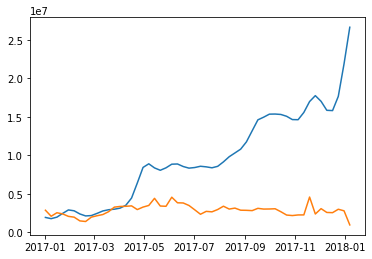

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()

for frame in [pred_nodes, true_nodes]:
    plt.plot(frame.columns,frame.loc['sales'])

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.show()